In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("./Data/alcaldeledezma_final.csv")

In [3]:
df = df.reindex(index=df.index[::-1])

In [4]:
df['index'] = np.arange(0, len(df),1)
df.head()

,id,created_at,full_text,date,length,sentiment,index
2654,704755018969255940,2016-03-01 19:47:44,Tonight I'm heading to Miami for our Florida K...,2016-03-01,136,0.697315,0
2653,704759584049733632,2016-03-01 20:05:53,@Brian_Allen5 Yes! I'll be in Lexington on Fri...,2016-03-01,98,0.398890,1
2652,704778206579191808,2016-03-01 21:19:53,There is so much at stake in this election. Ge...,2016-03-01,114,0.514522,2
2651,704787933346336768,2016-03-01 21:58:32,".@ScottRigell says if Trump is the nominee, ""t...",2016-03-01,136,0.507445,3
2650,704804642434236417,2016-03-01 23:04:56,"GEORGIA, VERMONT &amp; VIRGINIA: You have 1 ho...",2016-03-01,143,0.539278,4


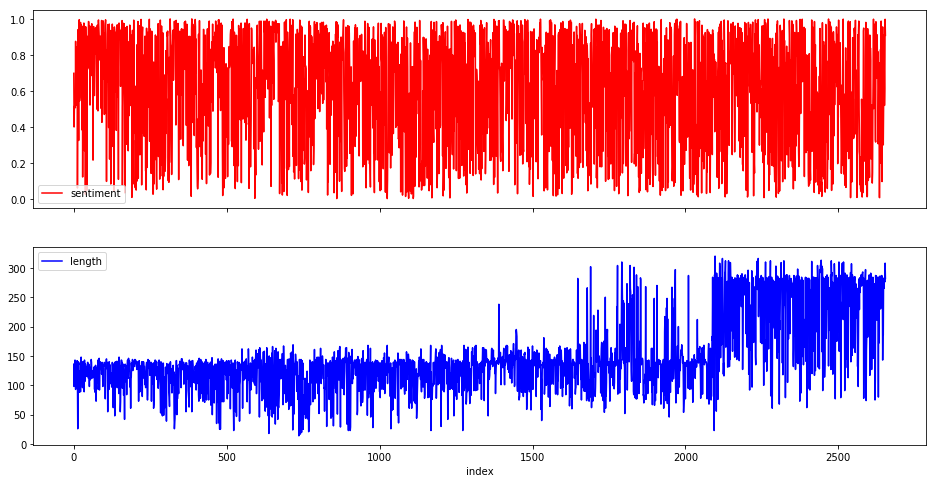

In [5]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(16,8))
df.plot(x='index', y='sentiment', color='r', ax = ax[0])
df.plot(x='index', y='length', color='b', ax = ax[1])

In [6]:
df['sentiment'].mean()

0.6030560288059551

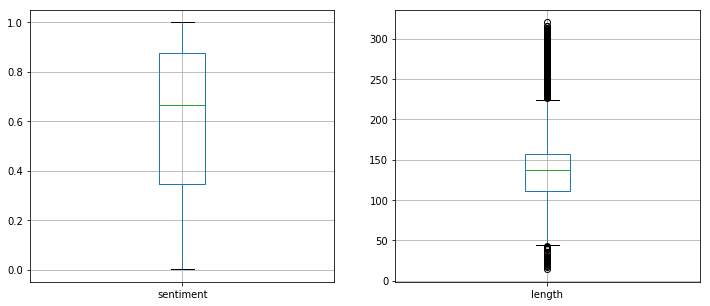

In [7]:
fig, ax = plt.subplots(1,2, sharey=False, figsize=(12,5))
df[['sentiment']].boxplot(ax = ax[0])
df[['length']].boxplot(ax = ax[1])

In [8]:
pos_samples = df[df['sentiment'] > 0.9].sample(10)
neg_samples = df[df['sentiment'] < 0.3].sample(10)
neu_samples = df[(df['sentiment'] < 0.55) & (df['sentiment'] > 0.45)].sample(10)

In [9]:
print("Extra Positive Results:")
for i in range(2):
    test = np.random.randint(0,10)
    print("Msg: ", pos_samples.iloc[test,2])
    print("Score: ", pos_samples.iloc[test,5])
print('-----------------------------------------------')    
print("Neutral Results:")
for i in range(2):
    test = np.random.randint(0,10)
    print("Msg: ", neu_samples.iloc[test,2])
    print("Score: ", neu_samples.iloc[test,5])
print('-----------------------------------------------')    
print("Extra Negative Results:")
for i in range(2):
    test = np.random.randint(0,10)
    print("Msg: ", neg_samples.iloc[test,2])
    print("Score: ", neg_samples.iloc[test,5])

Extra Positive Results:
Msg:  Last night's #GOPDebate made it clear who was prepared and who has the best grasp of the issues facing our country. https://t.co/p81iuUERdl
Score:  0.9709842614278708

#FLSen https://t.co/LgA33rBPMM
Score:  0.9721462109614626
-----------------------------------------------
Neutral Results:
Msg:  There is so much at stake in this election. Get out and vote for me today on #SuperTuesday https://t.co/kY8cQ49RMg
Score:  0.5145217355352001
Msg:  Let there be no doubt Haiti, Dominican Republic &amp; El Salvador support for @NicolasMaduro in @OAS_official will impact relationship with U.S.
Score:  0.5240268300956747
-----------------------------------------------
Extra Negative Results:
Msg:  Yet another example of #China trying to bully American companies. These guys play hard ball. Do not feel bad for #ZTE or any Chinese company going out of business. They have put plenty of American companies out of business by stealing from them. https://t.co/H2MBisb5pT
Score